In [1]:
# Voting Classifier

In [1]:
# import library packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Given Dataset
data=pd.read_csv('Maternal_Health.csv')

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [6]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [7]:
from sklearn.preprocessing import LabelEncoder
var=['RiskLevel']
label=LabelEncoder()
for i in var:
    df[i]=label.fit_transform(df[i]).astype(int)

In [8]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [9]:
# Preprocessing, Split test and dataset, split response variable
X=df.drop(labels='RiskLevel',axis=1)
# Response Variable
y=df.loc[:,'RiskLevel']

In [10]:
# Splitting for Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)
print('Number of Training Dataset:',len(X_train))
print('Number of Test Dataset:',len(X_test))
print('Total Number of Dataset:',len(X_train)+len(X_test))

Number of Training Dataset: 709
Number of Test Dataset: 305
Total Number of Dataset: 1014


In [11]:
# Implementing Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [12]:
mlpc=MLPClassifier()
rf=RandomForestClassifier()
LR=LogisticRegression()

In [13]:
vc=VotingClassifier(estimators=[('MLP Classifier',mlpc),('Random Forest Classiifer',rf),
                                ('Logistic Regression',LR)],voting='soft',weights=[2,8,1])

In [14]:
# Training
vc.fit(X_train,y_train)
predicted=vc.predict(X_test)

In [15]:
# Finding Accuracy
accuracy=accuracy_score(y_test,predicted)
print('Accuracy of Voting Classifier is: ',accuracy*100)
predicted_Train=vc.predict(X_train)
accuracy=accuracy_score(y_train,predicted_Train)
print('Training Accuracy of Voting Classifier ',accuracy*100)

Accuracy of Voting Classifier is:  85.90163934426229
Training Accuracy of Voting Classifier  92.2425952045134


In [16]:
# Finding Classification Report
cr=classification_report(y_test,predicted)
print('Classification Report\n---------------------\n',cr)

Classification Report
---------------------
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        82
           1       0.86      0.84      0.85       122
           2       0.78      0.82      0.80       101

    accuracy                           0.86       305
   macro avg       0.87      0.87      0.87       305
weighted avg       0.86      0.86      0.86       305



In [17]:
# Finding Confusion Matrix
cm=confusion_matrix(y_test,predicted)
print('Confusion Matrix\n----------------\n',cm)

Confusion Matrix
----------------
 [[ 77   1   4]
 [  0 102  20]
 [  2  16  83]]


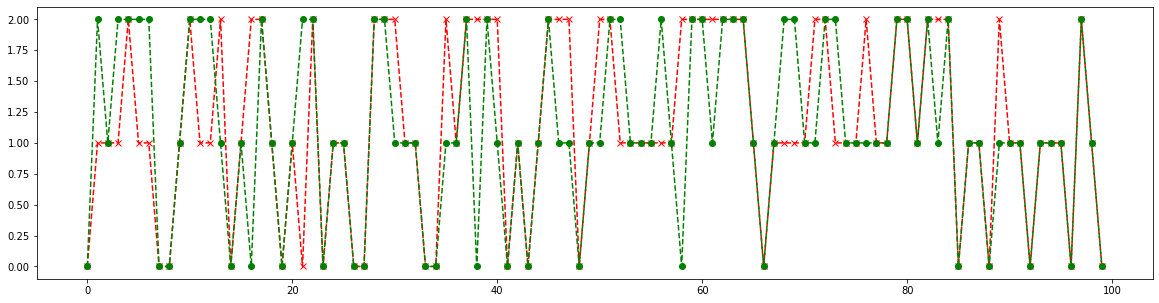

In [18]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='red')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='green')
plt.show()

In [19]:
# Creating PKL File

In [20]:
import joblib
joblib.dump(vc,'maternal.pkl')

['maternal.pkl']